In [3]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
import numpy as np
import shap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline

# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">Executive Summary</div>

St. James Hospital’s “Baby Monitor” ML model produced misclassifications of newborn risk leading to patient fatality. The model’s unreliability and lack of transparency have jeopardized patient safety and eroded the trust of the hospital staff. The Organization for Whitebox ModeLs (OWL) was commissioned to diagnose the model’s failures and propose a safer and more transparent alternative. The objective is to deliver a reliable predictive model and a governance framework that ensures clear explanations and effective human oversight

When evaluating the original model, we found critical flaws. The main flaw of the system is it prioritized precision over recall, an evaluation metric that is optimized for hospital efficiency rather than patient safety, resulting in a low 57.1% recall rate for at-risk infants. In contrast, a new decision tree model achieved a 99% recall rate, providing a more reliable model alternative. 

To ensure long-term model safety and effectiveness, we have 2 recommendations. First is St. James Hospital should continuously improve the model’s generalizability by expanding and diversifying the dataset with data from other hospitals and diverse demographic regions. Second is we advice implementing advanced class balancing techniques, exploring and combining various sampling methods to enhance the performance and transparency of all models, which will further reduce the risk of misclassification.


# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">I. Introduction</div>

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Overview</div>

The Organization for Whitebox ModeLs (OWL) was commissioned by St. James Hospital to audit the Baby Monitor Project, an AI-based system developed by Data Monitors for the hospital’s OB-GYN department. The system was designed to predict newborn risk levels and support staff in providing timely care.

Although the project initially showed strong results in improving efficiency and patient satisfaction, a series of misclassifications, one of which resulted in a fatality, prompted serious concerns regarding the model’s accuracy and transparency.

This report summarizes OWL’s independent assessment of the Baby Monitor model and outlines findings, issues, and recommendations to guide St. James Hospital in strengthening the safety, reliability, and governance of future AI solutions.



## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Problem</div>

1.How did the erroneous model make its predictions?

2.What features contributed to the misclassification of the 12 babies, what do these reveal about the model’s decision making process?

3.How can Data Monitors improve its preprocessing, modelling, and metrics to improve model detection and interpretability? 

4.What strategies can be implemented into a framework to ensure ongoing human involvement and effective risk mitigation while using the machine learning model?


## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Project Objectives</div>

This assessment aims to tackle two main objectives. The first objective is to investigate and interpret the erroneous model. Interpreting the model allows the OWL and St. James Hospital to discover the logic behind its predictions, cross-reference the findings with healthcare practitioners, and troubleshoot faulty steps in preprocessing the data and training the model. This entails understanding the behavior of the model, particularly in detecting most prominent patterns in predicting the health of the 12 misclassified babies to see where the model went wrong.

The second objective is to propose a better model and framework that reduces the risks of misclassifications and ensures that any errors are quickly detected and mitigated. The new machine learning model must be able to transparently provide clean explanations for its decisions. The framework also entails seamlessly integrating the model into the workflow and educating stakeholders on proper intervention. This framework will serve as a template for future machine learning modeling efforts.


## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Significance of the Report</div>

Explainable models and robust decision-making frameworks are necessary to develop trust between doctors, nurses, and patients. Machine learning is a powerful tool to detect complex relationships and patterns. When used correctly, it can help medical practitioners become more efficient in their tasks and provide better patient care. However, integrating machine learning in decision-making entails responsibility and accountability. In the context of healthcare, one wrong mistake can lead to the loss of one’s life. Machine learning models need to be transparent so that medical practitioners can make informed decisions in communicating health concerns to the patient and providing personalized treatment. 



# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">II. Methodology</div>

The methodology is as follows:

1. Data Collection 
    Data was provided of St. James Hospital’s historical records for 70 babies. Exploratory Data Analysis will be used to understand the dataset: duplicate values, distributions for each feature, and other patterns present with the data. 

2. Evaluation of Data Monitor’s Model
    The original model, its specification, and its accuracies (recall, precision, accuracy), were also provided by St. James Hospital. The models were run to identify the model’s current classification report. Preprocessing steps were analyzed and implied based on the model specifications and parameters. Then, the pre-processing, modelling, and evaluation metrics were critiqued. 

3. Analysis of the Misclassified Babies
    SHAP was used to analyze the decisions behind classifying the 12 babies as healthy. By applying SHAP on both an individual instance and a group instance, stakeholders can recognize which features have a large influence on the final prediction and lead to the misclassification.

4. Improved Model
	Given the previous observations, the team suggests more appropriate preprocessing methods, model types, and evaluation metrics for detecting and classifying newborn risk levels. The new model will also be interpreted through SHAP to showcase the contribution of each feature to this new model’s predictions, and particularly in discrepancies that possibly misclassified the 12 false negatives. 

5. Robust Framework 
    Finally, the team suggests ways to seamlessly integrate the system into the hospital’s workflow. The framework allows for human intervention so that errors are easily mitigated. 


# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">III. Data Description</div>

The following features are contained within the ```historical.csv```. The dataset has a shape of 2,100 rows and 25 columns:


<div align="center">

| **Feature Name**              | **Feature Description**                            | **Data Type** |
| :----------------------------: | :------------------------------------------------: | :------------: |
| `baby_id`                     | Unique identifier for each baby                    | string        |
| `name`                        | Name of the baby                                   | string        |
| `gender`                      | Gender of the baby (Male/Female)                   | string        |
| `gestational_age_weeks`       | Gestational age at birth (normal: 37–42 weeks)     | float         |
| `birth_weight_kg`             | Weight of the baby at birth (normal: 2.5–4.5 kg)   | float         |
| `birth_length_cm`             | Length of the baby at birth (average: 48–52 cm)    | float         |
| `birth_head_circumference_cm` | Head circumference at birth (average: 33–35 cm)    | float         |
| `date`                        | Monitoring date                                    | string (date) |
| `age_days`                    | Age of the baby in days since birth                | integer       |
| `weight_kg`                   | Recorded daily weight                              | float         |
| `length_cm`                   | Recorded daily body length                         | float         |
| `head_circumference_cm`       | Recorded daily head circumference                  | float         |
| `temperature_c`               | Body temperature in °C (normal: 36.5–37.5)         | float         |
| `heart_rate_bpm`              | Heart rate (normal: 120–160 bpm)                   | integer       |
| `respiratory_rate_bpm`        | Respiratory rate (normal: 30–60 bpm)               | integer       |
| `oxygen_saturation`           | Oxygen saturation level (normal >95%)              | integer       |
| `feeding_type`                | Type of feeding: Breastfeeding, Formula, or Mixed  | string        |
| `feeding_frequency_per_day`   | Number of feeds per day (normal: 8–12)             | integer       |
| `urine_output_count`          | Wet diaper count per day (normal: 6–8+)            | integer       |
| `stool_count`                 | Bowel movements per day (0–5 typical)              | integer       |
| `jaundice_level_mg_dl`        | Bilirubin level (normal <5, mild 5–12, severe >15) | float         |
| `apgar_score`                 | APGAR score at birth (0–10, recorded on day 1)     | float         |
| `immunizations_done`          | Immunizations completed (Yes/No)                   | string        |
| `reflexes_normal`             | Whether newborn reflexes are normal (Yes/No)       | string        |
| `risk_level`                  | Target variable: Healthy (0) or At Risk (1)        | string        |

</div>


With the `risk_level` being the target feature for the model.

# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">IV. Evaluation of Data Monitor’s Model</div>

Data Monitor provided St. James’ Hospital with a model that acts as a Baby Monitor for the OBGYN Ward. The model provides a daily prediction of whether the baby is healthy or at risk based on various factors. It preprocessed the data based on its data type and ensured that each feature was understood by the machine. Then, it used Logistic Regression to learn and identify patterns within the dataset. Finally, the model developing team used precision as their evaluation metric to assess the performance of the model.


<div style="text-align: center;">
    <img src="https://imgur.com/d3aDLA7.png" alt="Boxplots of Numerical Features" width="800">
</div>

<div style="text-align: center;">
<p style="text-align: center; font-size: 14px; margin-bottom: 30px; margin-left: 20px; font-style: italic;">
    Figure 1. Feature Importance of the Initial Model
</div>

Figure 1 shows the feature importance of the model provided by Data Monitor. It is evident that jaundice level is the most influential predictor, with heart rate and oxygen saturation following as key indicators, reflecting how the model weighs signs of distress versus stability.
Further directionality and feature interactions will be detailed in the upcoming SHAP analysis.

<div style="text-align: center;">
    <img src="https://imgur.com/SnFkXa5.png" alt="Boxplots of Numerical Features" width="600">
</div>

<div style="text-align: center;">
<p style="text-align: center; font-size: 14px; margin-bottom: 30px; margin-left: 20px; font-style: italic;">
    Figure 2. Global SHAP Summary Plot of the Initial Model
</div>

The global SHAP summary plot gives a view of how each feature influences the model’s predictions, with both magnitude and direction of influence, showing how risk predictions change depending on the baby’s physiological profile. As seen above, jaundice level remains the strongest determinant of neonatal risk. Given the heavy distribution of blue points, this indicates that higher bilirubin values consistently push predictions toward the “At Risk” side. This confirms the model’s strong sensitivity to jaundice. Beyond jaundice, heart rate, oxygen saturation, and weight also shape the decision boundary of the model. Increased heart rate, lower oxygen saturation, and lower weight values tend to increase predicted risk.

To further interpret the model’s decision logic, we can later inspect the decision boundary and distribution for jaundice level specifically. This would help visualize how the model separates “Healthy” vs. “At Risk” infants and reveal the approximate threshold at which jaundice becomes critical in classification.


<div style="text-align: center;">
    <img src="https://imgur.com/rvMtKpC.png" alt="Boxplots of Numerical Features" width="750">
</div>

<div style="text-align: center;">
<p style="text-align: center; font-size: 14px; margin-bottom: 30px; margin-left: 20px; font-style: italic;">
    Figure 3. Partial Dependence Plot of Risk on Jaundice Level
</p>
</div>

Figure 3 displays the Partial Dependence Plot (PDP) of baby health on jaundice level. The plot shows that the model’s predicted probability of a baby being classified as 'At Risk' changes as bilirubin levels increase. The curve shows a strong and nonlinear relationship, where risk remains minimal below approximately 5 mg/dL, then rises sharply beyond 8–10 mg/dL, where the model predicts a significantly higher likelihood of classifying baby health as being at risk.

The insights from the PDP complements the above global SHAP analysis that ranked jaundice as the top predictor influencing model decisions. However, the PDP shows that the model’s reliance is not only strong, but also has a threshold or decision boundary, meaning that predictions change rapidly around a certain value.

<div style="text-align: center;">
    <img src="https://imgur.com/qhBWGC6.png" alt="Boxplots of Numerical Features" width="750">
</div>

<div style="text-align: center;">
<p style="text-align: center; font-size: 14px; margin-bottom: 30px; margin-left: 20px; font-style: italic;">
    Figure 4. Scatter Plot of Jaundice Levels by Baby Health Status
</p>
</div>

Figure 4 shows a scatter plot on the distribution of jaundice levels among infants, differentiated by their health status. Blue dots indicate healthy infants and red dots represent those classified as at risk.

There is clear decision boundary present in the health classification of babies based on their level of jaundice. Most healthy babies cluster within lower jaundice levels of 0–5 mg/dL, with the decision boundary being around 10 mg/dL; Cases beyond that level are commonly classified as being at risk. This plot trend suggests that higher bilirubin concentrations are strongly associated with elevated health risks.

However, the scatter plot also reveals a potential class imbalance, where healthy cases appear to heavily outnumber at-risk cases, as seen in the heavy clustering of healthy cases between 2-4 mg/dL. This imbalance may contribute to misclassifications where the model may struggle to correctly identify subtle cases of elevated risk due to the dominance of healthy examples in the training data.

Although this plot reflects raw observed data rather than model predictions, it effectively highlights both the clinical significance of jaundice level and the impact of data distribution on model performance — underscoring the need for balanced datasets or resampling techniques to improve classification reliability.


<div style="text-align: center;">
    <img src="https://imgur.com/YOY5deo.png" alt="Boxplots of Numerical Features" width="750">
</div>

<div style="text-align: center;">
<p style="text-align: center; font-size: 14px; margin-bottom: 30px; margin-left: 20px; font-style: italic;">
    Figure 5. Bar Graph of Class Imbalance on the Decision Boundary (10 mg/dL)
</p>
</div>

Figure 5 presents a bar chart comparing the number of infants with jaundice levels above and below the 10 mg/dL threshold among selected instances. The majority of babies fall within the <10 mg/dL group, while a smaller subset exceeds 10 mg/dL. This distribution reinforces the class imbalance observed earlier, where most babies exhibit normal or moderately elevated bilirubin levels, while only a limited number display severe jaundice. Such imbalance can influence model performance as the classifier may become biased toward predicting the more common category and underperform when identifying rare high-risk cases.

To address this, the proposed model aims to reduce dependency on jaundice alone by incorporating a broader set of physiological and developmental features, such as weight, reflexes, feeding type, and immunization status. By diversifying the feature space and rebalancing the training data, the new model is expected to achieve better generalization and fairer predictions across all baby health profiles.

# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">V. SHAP</div>

To explain why the babies were misclassified, this section will use Shapley Additive Explanations (SHAP) to explore individual instances and group instances that could have led to misclassifying these babies as ‘healthy’. SHAP uses Shapley values to identify how each feature contributed to the outcome. 

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Individual Instance</div>

When looking at the SHAP values for a single instance,  the plot shows you how much each feature moved the prediction up or down. In this instance, the outcome ‘healthy’ is labelled as 0, while the outcome ‘at risk’ is labelled 1. Therefore, when the Shapley value moves the prediction down (-), it means that those feature values for that instance move towards a ‘Healthy’ outcome and vice versa.  The plot below represents one of the misclassified babies. 

From here, we can draw the following conclusions:
   
1. The baby's jaundice level and heart rate have contributed significantly to why the model predicted the baby to be healthy
2. A few features, such as weight and head circumference, have added small risks but not enough to offset the outcome.


<a href="https://ibb.co/Kp7yQdVb"><img src="https://i.ibb.co/Q3nmqLYp/Screen-Shot-2025-10-17-at-10-18-19-PM.png" alt="Screen-Shot-2025-10-17-at-10-18-19-PM" border="0"></a>

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Group Instance</div>

Below is a beeswarm plot of the cumulative Shapley values of the false negative babies. The group instance tells us how high and low values of the features impact the model outcome, giving us better and more actionable insights.

1. Lower values for jaundice, heart rate, and the baby’s age in days have had a significant contribution to mislabelling the babies as healthy, which is in line with the single instance plot.
2. Higher values of weight and oxygen saturation have also significantly pulled the prediction lower


<a href="https://ibb.co/jxJJFn1"><img src="https://i.ibb.co/wbcc15x/Screen-Shot-2025-10-17-at-10-19-50-PM.png" alt="Screen-Shot-2025-10-17-at-10-19-50-PM" border="0"></a>

# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">VI. Improved Model</div>

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Improved Pre-processing</div>

To improve the pre-processing process, the team decided to address the class imbalance by using class weights. Class weights are numerical values assigned to each class to help the model pay more attention to the minority (underrepresented) class. Therefore, when adding the class weights, I ensured that both classes are equally balanced. **After modifying the model, it decreased the test accuracy to 87.1%, precision to 51.1%, but significantly increased the recall to 83.8%.** This tells us that the model has improved in generability and in identifying patterns in the minority dataset. Subsequently, this leads to fewer mistakes in misclassifying babies as healthy when they are actually at risk.

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Interpretation</div>

Therefore, with this improved model, we can now compare the cumulative SHAP values for those false negative cases in the original model. Based on the figure below:

1. As compared to the initial plot, higher oxygen saturation has a higher contribution towards a healthier outcome.
2. Furthermore, the model identified that features such as the age of the babies in days do not contribute as much to the model outcome, while features such as length and birth weight have proven to have the opposite effect.

These discrepancies between the first model’s cumulative SHAP values and the modified version could have led to mislabelling the babies as healthier than at-risk.



<a href="https://ibb.co/qLb6bcvh"><img src="https://i.ibb.co/kVYZYwtz/Screen-Shot-2025-10-17-at-10-21-17-PM.png" alt="Screen-Shot-2025-10-17-at-10-21-17-PM" border="0"></a>

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Improved Model</div>

To get a better recall value, we can explore other models, such as tree-based models. These are machine learning algorithms that use decision trees to make predictions.
They split the data into smaller groups based on feature values until they reach a prediction. For this project, the team decided to explore XGBoost, Decision Tree, and Random Forest models

By using decision tree models, it resulted to the following evaluation scores:


<a href="https://ibb.co/r2y7Yy5L"><img src="https://i.ibb.co/1G2v12Rp/Screen-Shot-2025-10-17-at-10-23-17-PM.png" alt="Screen-Shot-2025-10-17-at-10-23-17-PM" border="0"></a>

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Evaluation</div>

In contrast to the modified logistic regression model, the tree-based models were able to score significantly better in test accuracy, precision, and recall. However, to choose the best model, we want the model with the highest recall, which is the Decision Tree model. Using this model would lessen the risk of false negatives, prevent more deaths, and effectively increase the efficiency of workers.



# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">VII. Conclusions and Recommendations</div>

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Limitations</div>

Despite the modified model significantly improving the performance Data Monitor's intial system, the study still comes with certain limitations:

1. Limited Feature Scope- The model relies on a lot of quantitative features and less of contextual data. Therefore, doctor's notes and maternal health information could help nurses and doctors better determine the health of the baby.

2. Limited Interpretability in Complex Models- Although tree-based models provide better evealuation metrics, they also increase the risk of overfitting and reduced transparency. Even with SHAP interpreting hundreds of possible feature interaction could be difficult for hospital personell.

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Recommendations</div>

To further the study, here are some recommendations to improve the model:

1. Expand and Diversify the Dataset- To improve the quality of the dataset, future researchers can collect related datasets from other hospitalsor different demographic regions. Doing so, can improve generability across certain areas or countries.

2. Implement Class Balancing Techniques- To improve effectivity of adressing class imbalance, it would be encouraged to combine and explore different sampling methods. If done properly, it could increase the performance of the non tree-based models to reduce chances of overfitting and increase transparency.

# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">Supplementary Materials</div>

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Loading Files</div>

In [4]:
# load the data frame
df = pd.read_csv('historical.csv')
fn_details = pd.read_csv('corrected_false_negatives.csv')

In [5]:
# get complete columns for false negative babies
fn_df = fn_details.merge(df, 
                         on=fn_details.columns.tolist(), 
                         how='left')

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Baseline Model</div>

In [6]:
# load old model for audit
model = joblib.load('old_model.joblib')

/opt/homebrew/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.7.1 when using version 1.7.2. This might lead to breaki

In [7]:
# get features used in old model

features = {}
for row in model.named_steps['preprocess'].transformers_:
    dtype, preprocess, col_list = row
    features[dtype] = col_list

all_features = [col for cols in features.values() for col in cols]
all_features

['gestational_age_weeks',
 'birth_weight_kg',
 'birth_length_cm',
 'birth_head_circumference_cm',
 'age_days',
 'weight_kg',
 'length_cm',
 'head_circumference_cm',
 'temperature_c',
 'heart_rate_bpm',
 'respiratory_rate_bpm',
 'oxygen_saturation',
 'feeding_frequency_per_day',
 'urine_output_count',
 'stool_count',
 'jaundice_level_mg_dl',
 'gender',
 'feeding_type',
 'immunizations_done',
 'reflexes_normal']

note that the 3 columns are missing from the transformers in the preprocessing step of the old model:
- baby_id
- name
- date
- apgar_score

This would probably suggest that these columns were dropped before loading the data into the model. The columns for Baby ID and name may have been dropped because these columns served as unque identifiers or labels of the data points, not a feature or column the model needs to identify patterns. 

Then, explain date (still unsure now why the dropped it)

On the other hand, the column for apgar score may have been dropped because it contains 2030 missing values. Dropping rows will empty values would reduce the database to 70 data points, which is not enough to train the model. Therefore, Data Monitors may have decided to drop the column instead to preserve majority of the data. OR they may have dropped it because the apgar score remains the same per baby, ofers no information about change over time — which makes it useless for modeling patterns across multiple time points per baby. However, we are not doing time series data so it wouldn't matter if they kept the column.

In [8]:
target_col = "risk_level"
X = df.drop(columns=[target_col])
X = df[all_features]
fn_df = fn_df[all_features]
y = df[target_col]

In [88]:
X

,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,gender,feeding_type,immunizations_done,reflexes_normal
0,40.2,3.30,50.0,31.9,1,3.28,50.1,32.0,37.0,160,36,98,11,9,0,4.2,Female,Formula,Yes,Yes
1,40.2,3.30,50.0,31.9,2,3.35,50.2,32.0,37.2,156,40,99,11,5,2,10.6,Female,Formula,No,No
2,40.2,3.30,50.0,31.9,3,3.35,50.6,32.1,37.1,137,37,97,7,6,5,9.8,Female,Breastfeeding,No,No
3,40.2,3.30,50.0,31.9,4,3.48,50.3,32.0,37.4,130,33,97,11,8,4,8.1,Female,Mixed,No,Yes
4,40.2,3.30,50.0,31.9,5,3.50,50.3,31.8,36.8,138,39,96,11,7,1,11.6,Female,Breastfeeding,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,41.7,4.21,51.3,34.3,26,4.99,52.5,34.8,37.1,141,36,98,8,8,2,2.5,Female,Mixed,No,Yes
2096,41.7,4.21,51.3,34.3,27,5.04,52.6,34.6,36.8,138,34,98,7,8,4,3.3,Female,Mixed,No,Yes
2097,41.7,4.21,51.3,34.3,28,5.05,52.9,34.9,37.3,131,46,97,11,6,2,3.2,Female,Mixed,No,Yes
2098,41.7,4.21,51.3,34.3,29,5.03,52.9,34.8,37.0,133,45,98,10,5,5,3.2,Female,Mixed,No,Yes


In [9]:
y = df['risk_level'].replace({'Healthy': 0, 'At Risk': 1}).values

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Predict train set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"F1: {train_f1:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"Recall: {train_recall:.3f}")

# Predict test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_train, y_train_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 8. Print results
print("===============================")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"F1: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print("===============================")
print("Test Set Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, y_pred)))

Train Accuracy: 0.926
F1: 0.684
Precision: 0.780
Recall: 0.608
Test Accuracy: 0.919
F1: 0.684
Precision: 0.762
Recall: 0.571
Test Set Confusion Matrix:
      0   1
0  354  10
1   24  32


/var/folders/db/ggx093sn7jd57knx244_768r0000gn/T/ipykernel_57706/907404551.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['risk_level'].replace({'Healthy': 0, 'At Risk': 1}).values


accuracy is high but precision and recall is bad. shows they prioritized accuracy, not precision or recall. it should be recall

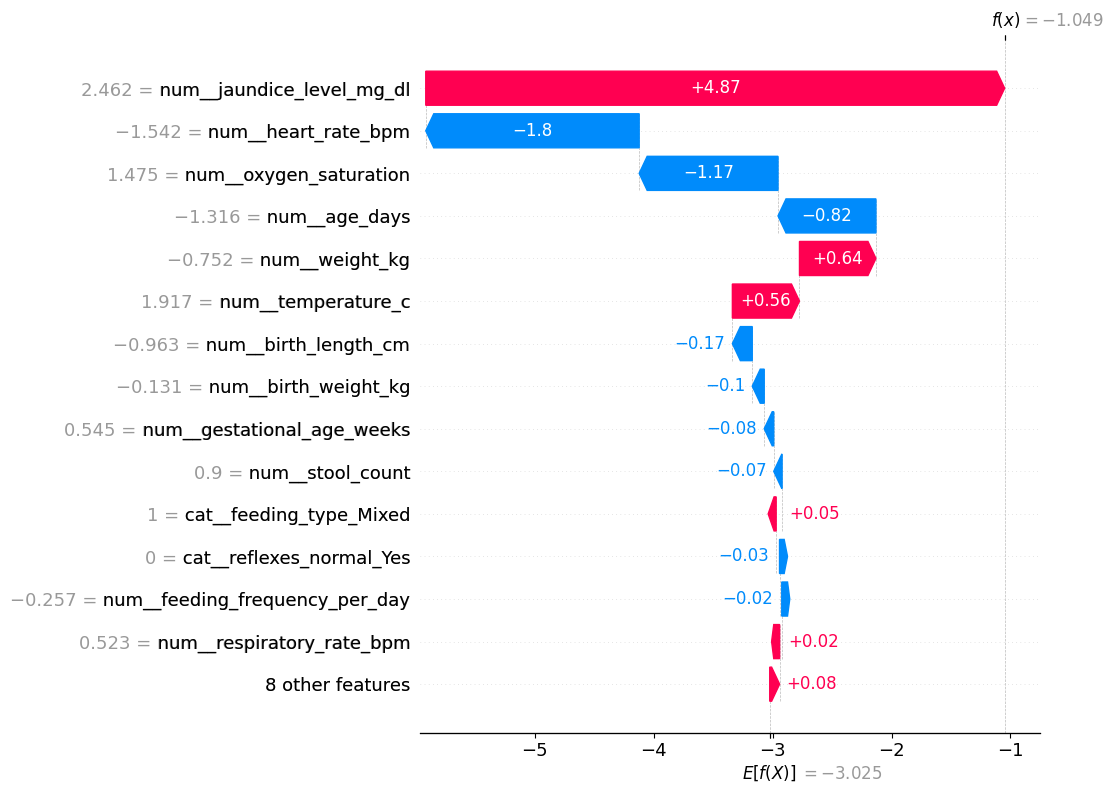

In [10]:
# Extract pipeline parts
preprocess = model.named_steps['preprocess']
clf = model.named_steps['clf']

# Transform full dataset
X_transformed = preprocess.transform(X_train)
feature_names = preprocess.get_feature_names_out()

# Initialize SHAP explainer on the classifier
explainer = shap.Explainer(clf, X_transformed, feature_names=feature_names)

# Select one instance
instance_index = 0
x_instance = preprocess.transform(fn_df.iloc[[instance_index], :])

# Compute SHAP values for that instance
shap_values = explainer(x_instance)

# Waterfall plot
shap.plots.waterfall(shap_values[0], max_display=15)

In [11]:
# Extract pipeline parts
preprocess = model.named_steps['preprocess']
clf = model.named_steps['clf']

# Transform full dataset
X_transformed = preprocess.transform(X_train)
feature_names = preprocess.get_feature_names_out()

for i in range(len(fn_df)):
    # Transform one instance at a time
    x_instance = preprocess.transform(fn_df.iloc[[i], :])
    
    # Compute SHAP values
    shap_values = explainer(x_instance)
    
    # Plot or save each explanation
    shap.plots.waterfall(shap_values[0], max_display=15)
    
    # Optional: pause or log
    print(f"Explained instance {i}")


NameError: name 'X_train' is not defined

    note: baby 0 - high jaundice
            baby 14 - high heart rate
            baby 15 - low oxygen
            baby 16 - heart rate and oxygen

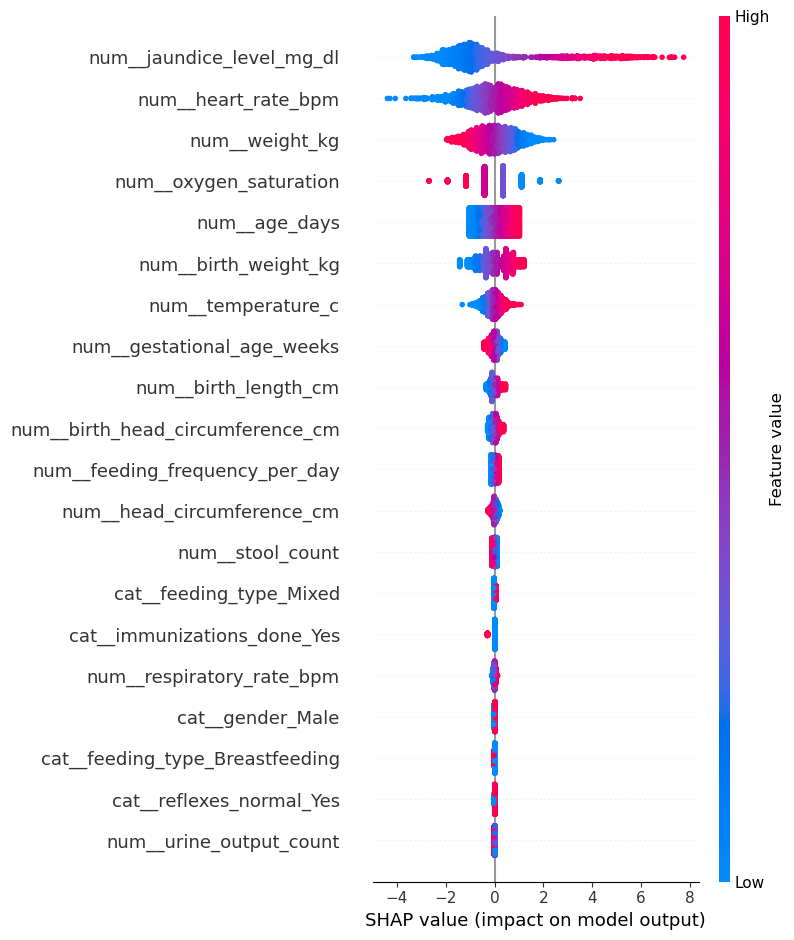

In [100]:
#tn = np.where((y_train == 0) & (y_train_pred == 0))[0]

# Transform all true negatives
x_all_instances = preprocess.transform(X)

# Compute SHAP values 
shap_values = explainer(x_all_instances)

# Show summary 
shap.summary_plot(shap_values,
                  features=x_all_instances,
                  feature_names=feature_names)


this one try to explain with all the datapoints (global explanation).

most influencial feature is the jaundice. the jaundice is the feature most likely to classify it as at risk. 

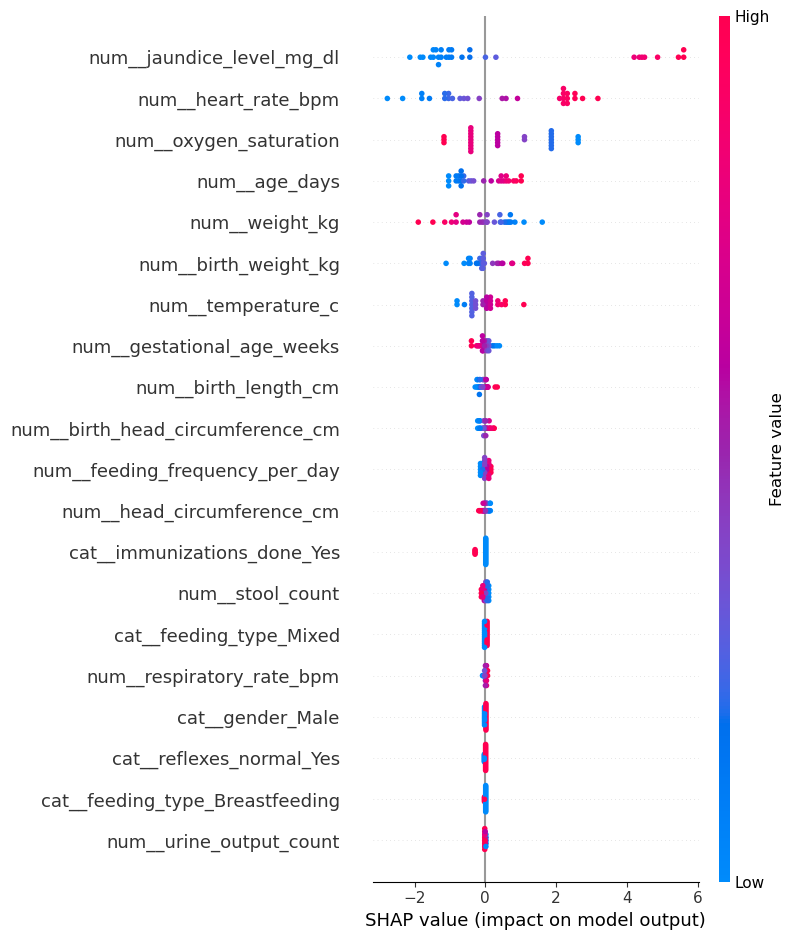

In [94]:
# Transform all false negatives 
x_instances = preprocess.transform(fn_df)

# Compute SHAP values 
shap_values = explainer(x_instances)

# Show summary 
shap.summary_plot(shap_values,
                  features=x_instances,
                  feature_names=feature_names)


most influencial feature is the jaundice. according to global explainability, the jaundice is the feature most likely to classify it as at risk. however, majority of the false negative actually have a low shap value for jaundice, causing the model to predict as healthy. since the model prioritizes accuracy, model would rather memorize and predict that the baby is healthy instead of capturing patterns.

also cross compare difference with the global version and the false negative version

In [18]:
from dice_ml import Data, Model, Dice

In [23]:
numerical_features = ['gestational_age_weeks', 'birth_weight_kg', 'birth_length_cm',
                     'birth_length_cm', 'birth_head_circumference_cm', 'age_days', 'weight_kg', 'length_cm',
                     'head_circumference_cm', 'temperature_c', 'heart_rate_bpm', 'respiratory_rate_bpm',
                     'oxygen_saturation', 'feeding_frequency_per_day','urine_output_count','stool_count',
                     'jaundice_level_mg_dl']

categorical_features = ['feeding_type']  # to be one-hot encoded
binary_features = ['gender','immunizations_done', 'reflexes_normal']  # already binary, leave as-is

In [26]:
train_data = X_train.join(pd.Series(y_train, name="risk_level"))

# We first create our DiCE input data
dice_df = Data(dataframe=train_data, 
               continuous_features=numerical_features ,
               categorical_features=categorical_features+binary_features, outcome_name="risk_level")

# Then we "endorse" our model to DiCE
dice_model = Model(model=model, backend="sklearn", model_type="classifier")

dice_exp = Dice(dice_df, dice_model) # We generate our DiCE explainer

In [43]:
instance_index = 0
x_instance = fn_df.iloc[[instance_index], :]

cfs = dice_exp.generate_counterfactuals(
    x_instance, total_CFs=4, desired_class=1,
    features_to_vary=["jaundice_level_mg_dl"],
    random_seed=42
)
cfs.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

Query instance (original outcome : 0)


,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,...,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,gender,feeding_type,immunizations_done,reflexes_normal,risk_level
0,39.900002,3.11,47.599998,34.400002,4,3.17,47.700001,34.5,37.599998,124,...,99,9,5,4,11.1,Male,Mixed,No,No,0



Diverse Counterfactual set (new outcome: 1)


,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,...,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,gender,feeding_type,immunizations_done,reflexes_normal,risk_level
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,12.6,-,-,-,-,1
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,13.6,-,-,-,-,1
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,13.8,-,-,-,-,1
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,14.6,-,-,-,-,1


it only takes an increase of 1.5 in jaundice to change the risk level to be at risk

In [41]:
instance_index = 9
x_instance = fn_df.iloc[[instance_index], :]

cfs = dice_exp.generate_counterfactuals(
    x_instance, total_CFs=4, desired_class=1,
    random_seed=42
)
cfs.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

Query instance (original outcome : 0)


,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,...,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,gender,feeding_type,immunizations_done,reflexes_normal,risk_level
0,39.799999,3.14,50.900002,36.0,1,3.21,51.0,36.0,36.799999,162,...,98,11,5,2,2.0,Female,Mixed,Yes,No,0



Diverse Counterfactual set (new outcome: 1)


,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,...,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,gender,feeding_type,immunizations_done,reflexes_normal,risk_level
0,-,4.19,-,-,-,-,-,-,-,-,...,-,-,-,-,14.1,-,-,-,-,1
1,-,-,-,-,-,-,-,-,-,-,...,-,8,-,-,9.5,-,-,-,-,1
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,13.1,-,-,-,-,1
3,-,-,-,-,-,-,-,-,-,122,...,-,-,-,-,13.6,-,-,-,-,1


Note that all counterfactuals suggest to change jaundice, with row 3 changing only jaundice, showing that jaundice is a very important factor used by the model to determine the risk level of patients.

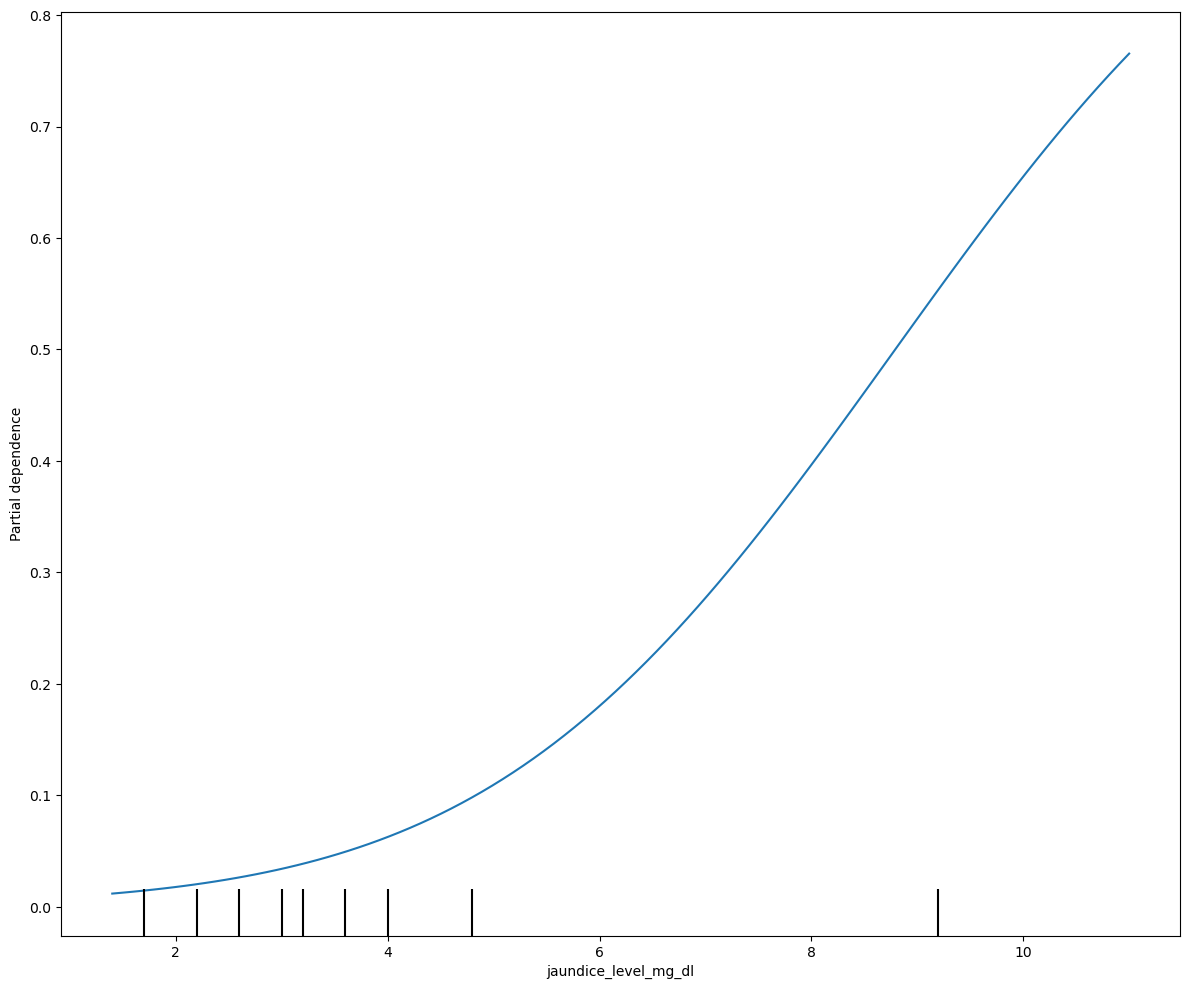

In [54]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 10))
disp = PartialDependenceDisplay.from_estimator(
    model, X_train, ["jaundice_level_mg_dl"], ax=ax
)
plt.tight_layout()

positive correlation of jaundice level and partial dependence. Change in jaundice has a drastic effect of likelihood to be at risk

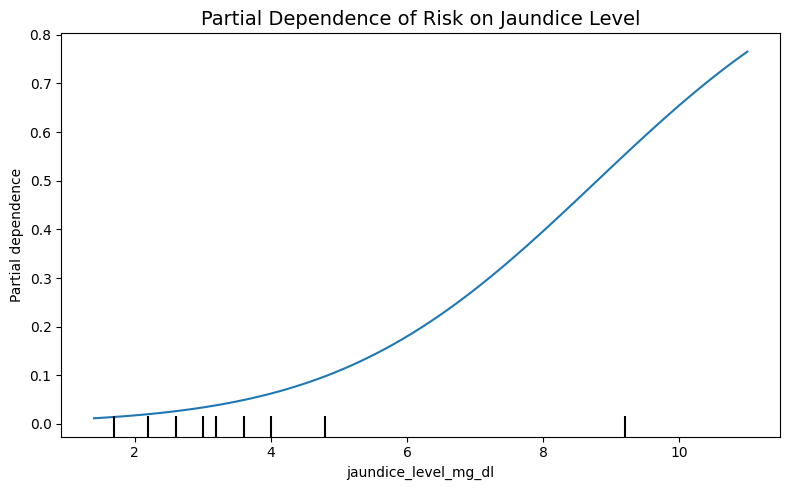

In [11]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# --- Partial Dependence Plot for Jaundice Level ---
fig, ax = plt.subplots(figsize=(8, 5))  # smaller aspect ratio

disp = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['jaundice_level_mg_dl'],
    ax=ax,
    kind='average',
    grid_resolution=100
)

# --- Adjust scaling and formatting ---
ax.set_xlim(0, 15)                    # jaundice range
ax.set_ylim(0, 0.8)                   # matches your plotted range
ax.set_xlabel('Jaundice Level (mg/dL)', fontsize=12)
ax.set_ylabel('Partial Dependence (Predicted Risk)', fontsize=12)
ax.set_title('Partial Dependence of Risk on Jaundice Level', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


ValueError: Feature 'gestational_age_weeks' not in feature_names

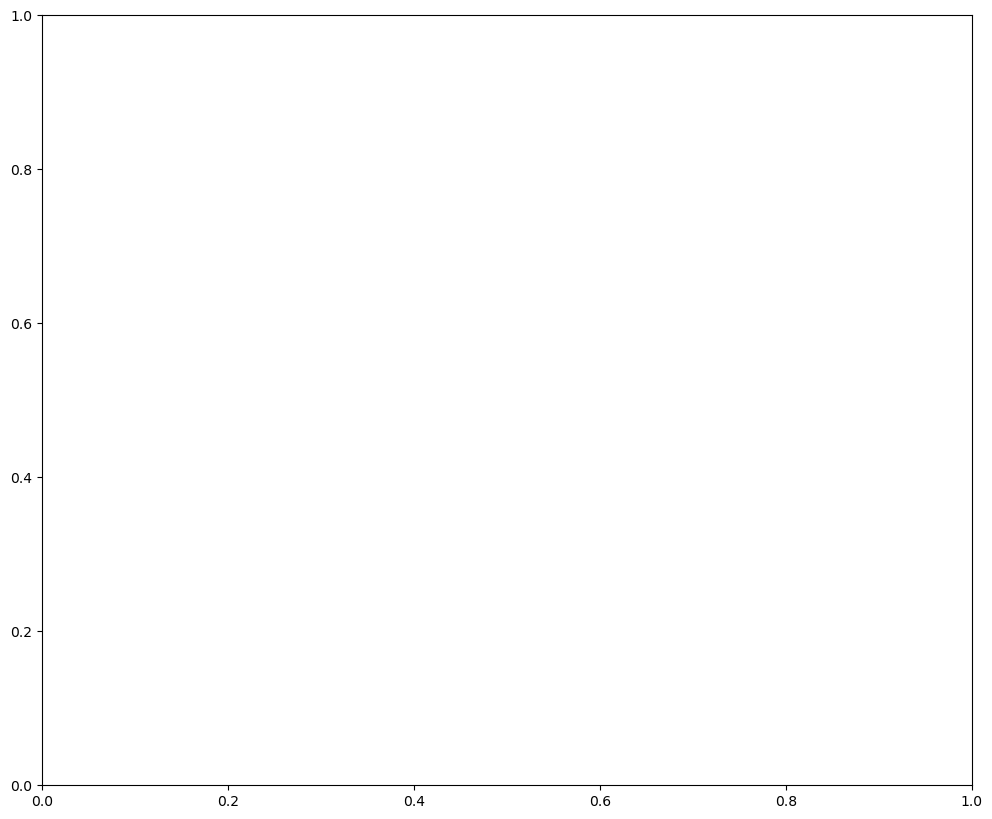

In [90]:
from sklearn.inspection import PartialDependenceDisplay

# Extract pipeline parts
preprocess = model.named_steps['preprocess']
clf = model.named_steps['clf']

# Transform full dataset
X_transformed = preprocess.transform(X_train)

fig, ax = plt.subplots(figsize=(12, 10))
disp = PartialDependenceDisplay.from_estimator(
    clf, X_transformed, numerical_features, ax=ax
)
plt.tight_layout()

## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Exploratory Data Analysis</div>

In [116]:
df["apgar_score"] = df["apgar_score"].ffill()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baby_id                      2100 non-null   object 
 1   name                         2100 non-null   object 
 2   gender                       2100 non-null   int64  
 3   gestational_age_weeks        2100 non-null   float64
 4   birth_weight_kg              2100 non-null   float64
 5   birth_length_cm              2100 non-null   float64
 6   birth_head_circumference_cm  2100 non-null   float64
 7   date                         2100 non-null   object 
 8   age_days                     2100 non-null   int64  
 9   weight_kg                    2100 non-null   float64
 10  length_cm                    2100 non-null   float64
 11  head_circumference_cm        2100 non-null   float64
 12  temperature_c                2100 non-null   float64
 13  heart_rate_bpm    

In [119]:
df = df.drop(columns=['baby_id', 'name', 'date'])

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'gestational_age_weeks'}>,
        <Axes: title={'center': 'birth_weight_kg'}>,
        <Axes: title={'center': 'birth_length_cm'}>],
       [<Axes: title={'center': 'birth_head_circumference_cm'}>,
        <Axes: title={'center': 'age_days'}>,
        <Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'length_cm'}>],
       [<Axes: title={'center': 'head_circumference_cm'}>,
        <Axes: title={'center': 'temperature_c'}>,
        <Axes: title={'center': 'heart_rate_bpm'}>,
        <Axes: title={'center': 'respiratory_rate_bpm'}>],
       [<Axes: title={'center': 'oxygen_saturation'}>,
        <Axes: title={'center': 'feeding_frequency_per_day'}>,
        <Axes: title={'center': 'urine_output_count'}>,
        <Axes: title={'center': 'stool_count'}>],
       [<Axes: title={'center': 'jaundice_level_mg_dl'}>,
        <Axes: title={'center': 'apgar_score'}>,
        <Axes: title={'center': 

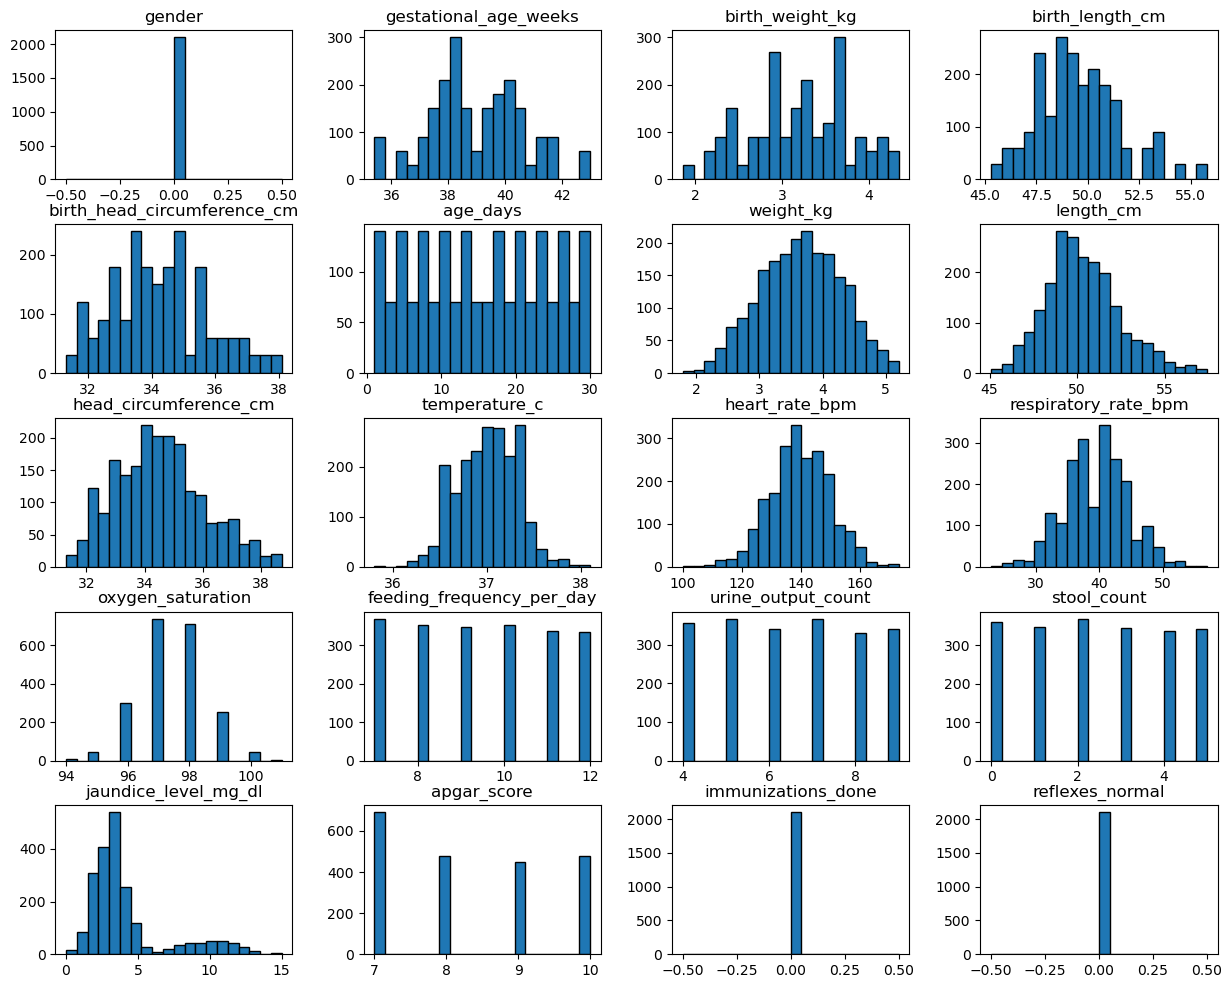

In [120]:
numeric_df = df.select_dtypes(include=['float64','int64'])

numeric_df.hist(
    figsize=(15,12),
    bins= 20,
    edgecolor='black',
    grid=False,
)

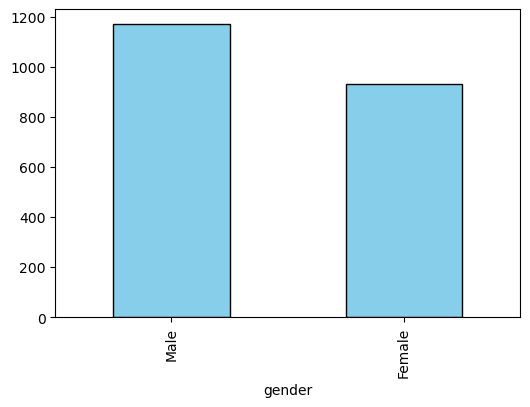

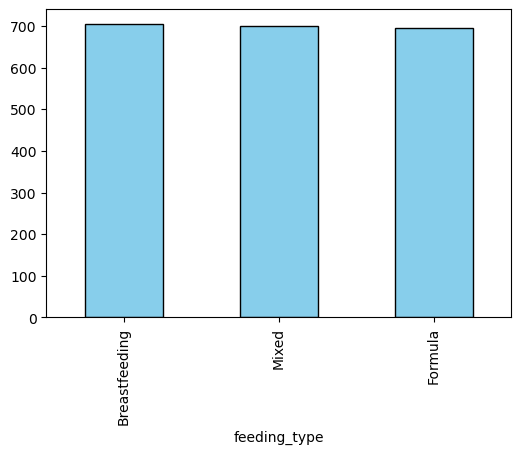

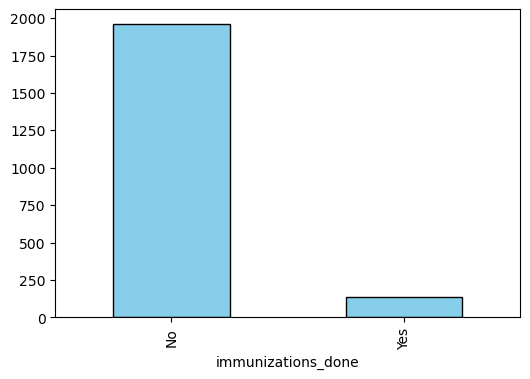

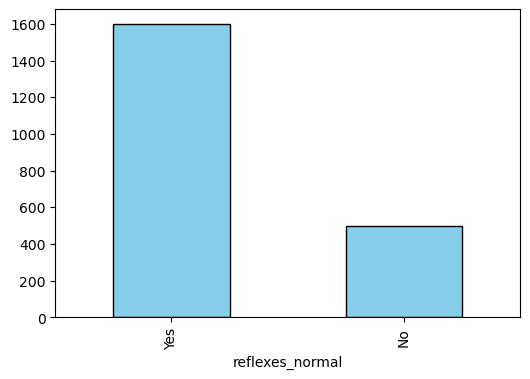

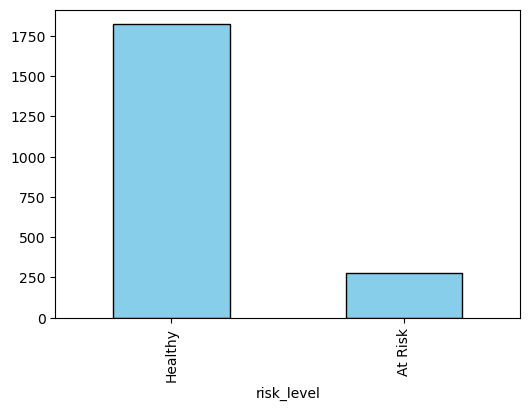

In [11]:
non_numeric_df = df.select_dtypes(exclude=['number'])

for col in non_numeric_df.columns:
    plt.figure(figsize=(6,4))
    non_numeric_df[col].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.show()

# <div style="background-color:#00357A; padding:20px; border-radius:10px; color:white; width:auto;">Proposed Method</div>


## <div style="background-color:#0081CC; padding:10px; border-radius:10px; color:white; width:auto;">Loading Files</div>

In [ ]:
# load the data frame
df = pd.read_csv('historical.csv')
fn_details = pd.read_csv('corrected_false_negatives.csv')

In [ ]:
df.iloc[:,9:]

,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,3.28,50.1,32.0,37.0,160,36,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,3.35,50.2,32.0,37.2,156,40,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,3.35,50.6,32.1,37.1,137,37,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,3.48,50.3,32.0,37.4,130,33,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,3.50,50.3,31.8,36.8,138,39,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,4.99,52.5,34.8,37.1,141,36,98,Mixed,8,8,2,2.5,NaN,No,Yes,Healthy
2096,5.04,52.6,34.6,36.8,138,34,98,Mixed,7,8,4,3.3,NaN,No,Yes,Healthy
2097,5.05,52.9,34.9,37.3,131,46,97,Mixed,11,6,2,3.2,NaN,No,Yes,Healthy
2098,5.03,52.9,34.8,37.0,133,45,98,Mixed,10,5,5,3.2,NaN,No,Yes,Healthy


In [ ]:
# get complete columns for false negative babies
fn_df = fn_details.merge(df, 
                         on=fn_details.columns.tolist(), 
                         how='left')

In [ ]:
# ----------- STEP 1: Define Feature Types -----------
# Sepeparate features by data types
numerical_features_std = ['weight_kg', 'length_cm',
                     'head_circumference_cm', 'temperature_c', 'heart_rate_bpm', 'respiratory_rate_bpm',
                     'oxygen_saturation', 'jaundice_level_mg_dl']

numerical_features_minmax = ['age_days', 'feeding_frequency_per_day','urine_output_count',
                             'stool_count']

numerical_features = numerical_features_std + numerical_features_minmax
categorical_features = ['feeding_type', 'gender','immunizations_done', 'reflexes_normal']
   
drop_col = ['baby_id', 'name', 'date', 'gestational_age_weeks', 'birth_weight_kg', 
                     'birth_length_cm', 'birth_head_circumference_cm','apgar_score']
df['risk_level'] = df['risk_level'].replace({'Healthy': 0, 'At Risk': 1}).values

/var/folders/kj/yzngsryj49x89n65fbvnvpqr0000gn/T/ipykernel_4520/3410062298.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['risk_level'] = df['risk_level'].replace({'Healthy': 0, 'At Risk': 1}).values


In [ ]:
# ----------- STEP 2: Train-Test Split by Baby -----------
# Get unique babies
unique_babies = df['baby_id'].unique()

# Split babies, not records
Train_babies, test_babies = train_test_split(
    unique_babies, test_size=0.15, random_state=0
)

# Split babies, not records
train_babies, val_babies = train_test_split(
    Train_babies, test_size=0.15, random_state=0
)

# Filter dataframe
train_df = df[df['baby_id'].isin(train_babies)].copy()
val_df = df[df['baby_id'].isin(val_babies)].copy()
test_df = df[df['baby_id'].isin(test_babies)].copy()

# Now fill within each set
train_df['apgar_score'] = train_df.groupby('baby_id')['apgar_score'].ffill()
val_df['apgar_score'] = val_df.groupby('baby_id')['apgar_score'].ffill()
test_df['apgar_score'] = test_df.groupby('baby_id')['apgar_score'].ffill()

X_train = train_df.drop(columns='risk_level')
X_train = X_train.drop(columns=drop_col)
y_train = train_df['risk_level']

X_val = val_df.drop(columns='risk_level')
X_val = X_val.drop(columns=drop_col)
y_val = val_df['risk_level']

X_test = test_df.drop(columns='risk_level')
X_test = X_test.drop(columns=drop_col)
y_test = test_df['risk_level']

In [ ]:
# ----------- STEP 3: Preprocessing Pipeline -----------

lr_preprocessor = ColumnTransformer(
    transformers=[
        ('num_std', StandardScaler(), numerical_features_std),
        ('num_minmax', MinMaxScaler(), numerical_features_minmax),
        ('cat', OneHotEncoder(drop="if_binary"), categorical_features),
    ]
)

rf_preprocessor = ColumnTransformer(
    transformers=[
        ('num_std', 'passthrough', numerical_features_std),
        ('num_minmax', 'passthrough', numerical_features_minmax),
        ('cat', OneHotEncoder(drop="if_binary"), categorical_features),
    ]
)

preprocessors = {
    'Logistic Regression (L2)': lr_preprocessor,
    'Logistic Regression (L1)': lr_preprocessor,
    'Random Forest': rf_preprocessor
}

# Parameter grids for hyperparameter tuning
params = {
    'Logistic Regression (L2)': {
        'smote__k_neighbors': [3, 5, 7],
        'clf__C': [1e-3, 1e-2, 1e-1, 1],
    },
    'Logistic Regression (L1)': {
        'smote__k_neighbors': [3, 5, 7],
        'clf__C': [1e-3, 1e-2, 1e-1, 1],
    },
    'Random Forest': {
        'smote__k_neighbors': [3, 5, 7],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [1, 2, 3],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
}

models = {
    'Logistic Regression (L2)': LogisticRegression(penalty = 'l2', max_iter=1000, solver='liblinear', random_state=42),
    'Logistic Regression (L1)': LogisticRegression(penalty = 'l1', max_iter=1000, solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [ ]:
# ----------- STEP 4: Hyperparameter Tune with Val Set -----------
results = []
trained_models = {}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")

    # Fit preprocessor to get categorical feature indices
    preprocessor = preprocessors[name].fit(X_train)
    feature_names_out = preprocessor.get_feature_names_out()
    
    numerical_count = len(numerical_features)
    new_categorical_features = preprocessor.named_transformers_['cat']
    categorical_count = len(new_categorical_features.get_feature_names_out())
    indices = list(range(numerical_count, numerical_count + categorical_count))

    # Declare pipeline
    pipe = imb_pipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTENC(categorical_features=indices,
                          random_state=42)),
        ("clf", model)
        
    ])

    # Hyperparameter tuning
    rcv = RandomizedSearchCV(pipe, params[name], 
                             random_state=0, scoring='recall', cv=kfold)
    search = rcv.fit(X_train, y_train)
    
    best_params = search.best_params_
    best_model = search.best_estimator_
    print(best_params)
    trained_models[name] = best_model

    # Get prediction probabilities
    threshold = 0.5
    y_train_proba = best_model.predict_proba(X_train)[:, 1]
    y_val_proba = best_model.predict_proba(X_val)[:, 1]
    
    y_train_pred = (y_train_proba >= threshold).astype(int)
    y_val_pred = (y_val_proba >= threshold).astype(int)
    
    results.append({
        'Model': name,
        'Train_Acc': accuracy_score(y_train, y_train_pred),
        'Val_Acc': accuracy_score(y_val, y_val_pred),
        'Train_F1': f1_score(y_train, y_train_pred),
        'Val_F1': f1_score(y_val, y_val_pred),
        'Train_Precision': precision_score(y_train, y_train_pred),
        'Val_Precision': precision_score(y_val, y_val_pred),
        'Train_Recall': recall_score(y_train, y_train_pred),
        'Val_Recall': recall_score(y_val, y_val_pred),
    })

# ----------- STEP 5: Show Results -----------

results_df = pd.DataFrame(results).sort_values(by='Val_Recall', ascending=False).reset_index(drop=True)
print(results_df)


Training: Logistic Regression (L2)
{'smote__k_neighbors': 3, 'clf__C': 0.1}

Training: Logistic Regression (L1)
{'smote__k_neighbors': 5, 'clf__C': 0.01}

Training: Random Forest
{'smote__k_neighbors': 3, 'clf__n_estimators': 100, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 4, 'clf__max_depth': 3}
                      Model  Train_Acc   Val_Acc  Train_F1    Val_F1  \
0             Random Forest   0.992000  0.981481  0.969388  0.929577   
1  Logistic Regression (L1)   0.871333  0.870370  0.644567  0.615385   
2  Logistic Regression (L2)   0.890000  0.866667  0.675835  0.600000   

   Train_Precision  Val_Precision  Train_Recall  Val_Recall  
0         0.984456       0.970588      0.954774    0.891892  
1         0.508721       0.518519      0.879397    0.756757  
2         0.554839       0.509434      0.864322    0.729730  


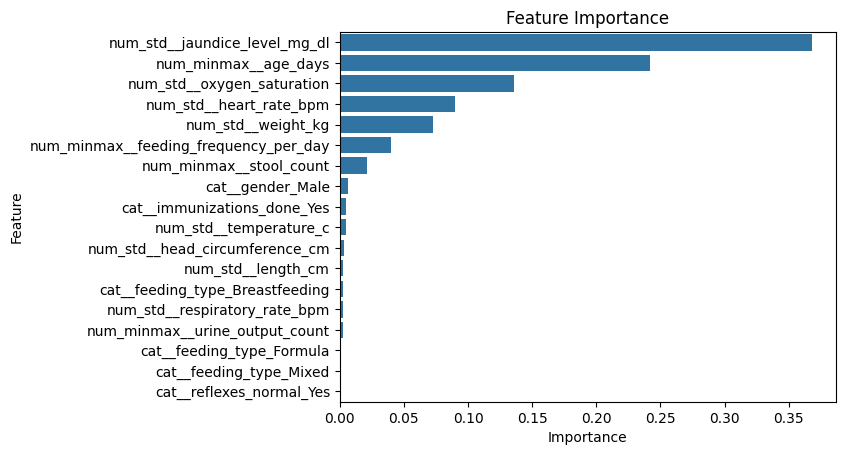

In [ ]:
best_pipe = trained_models[results_df.loc[0,'Model']]
best_model = best_pipe.named_steps['clf']

best_pipe.fit(X_train, y_train)

FEATURE_NAMES_NEW = preprocessor.get_feature_names_out()
feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': FEATURE_NAMES_NEW,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
# See result of best model on test set
y_train_proba = best_pipe.predict_proba(X_train)[:, 1]
y_train_pred = (y_train_proba >= threshold).astype(int)

y_test_proba = best_pipe.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= threshold).astype(int)
print(classification_report(y_test, y_test_pred))
print(pd.DataFrame(confusion_matrix(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       288
           1       0.89      0.95      0.92        42

    accuracy                           0.98       330
   macro avg       0.94      0.97      0.95       330
weighted avg       0.98      0.98      0.98       330

     0   1
0  283   5
1    2  40


In [ ]:
from sklearn.pipeline import Pipeline
from model import WhiteBox
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
results = []

pipe = Pipeline(
    [("clf", WhiteBox())]
)

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

results.append({
        'Model': name,
        'Train_Acc': accuracy_score(y_train, y_train_pred),
        'Val_Acc': accuracy_score(y_val, y_val_pred),
        'Train_F1': f1_score(y_train, y_train_pred),
        'Val_F1': f1_score(y_val, y_val_pred),
        'Train_Precision': precision_score(y_train, y_train_pred),
        'Val_Precision': precision_score(y_val, y_val_pred),
        'Train_Recall': recall_score(y_train, y_train_pred),
        'Val_Recall': recall_score(y_val, y_val_pred),
    })

# ----------- STEP 5: Show Results -----------

results_df = pd.DataFrame(results).sort_values(by='Val_F1', ascending=False).reset_index(drop=True)
print(results_df)

           Model  Train_Acc   Val_Acc  Train_F1    Val_F1  Train_Precision  \
0  Random Forest      0.992  0.981481  0.969388  0.929577         0.984456   

   Val_Precision  Train_Recall  Val_Recall  
0       0.970588      0.954774    0.891892  


In [ ]:
model = pipe.named_steps['clf']

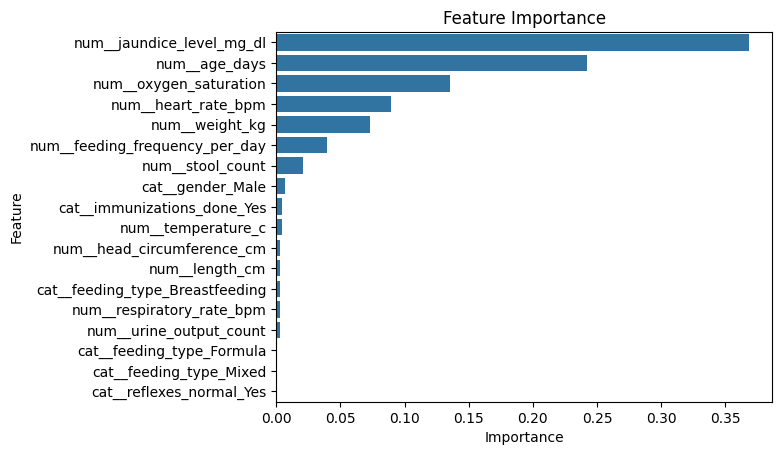

In [ ]:
sns.barplot(x='Importance', y='Feature', data=model._get_feature_importance())
plt.title('Feature Importance')
plt.show()

In [ ]:
# Fit the model
model.fit(X_train, y_train)

instance = fn_df.iloc[[0]]  
explanation = model._explain_instance(instance)

explanation.show_in_notebook()

In [ ]:
# Read test.csv file
prediction = pd.read_csv("test.csv")

# Drop identifiable and birth details
X_prediction = prediction.drop(columns=drop_col)
id_prediction = prediction['baby_id']

# Predict outcomes using best model
y_prediction = pipe.predict_proba(X_prediction)[:,1]
df_prediction = pd.DataFrame({"id": id_prediction, 
                              "At Risk Outcome": y_prediction})

df_prediction.to_csv("model_output.csv", index=False)